In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

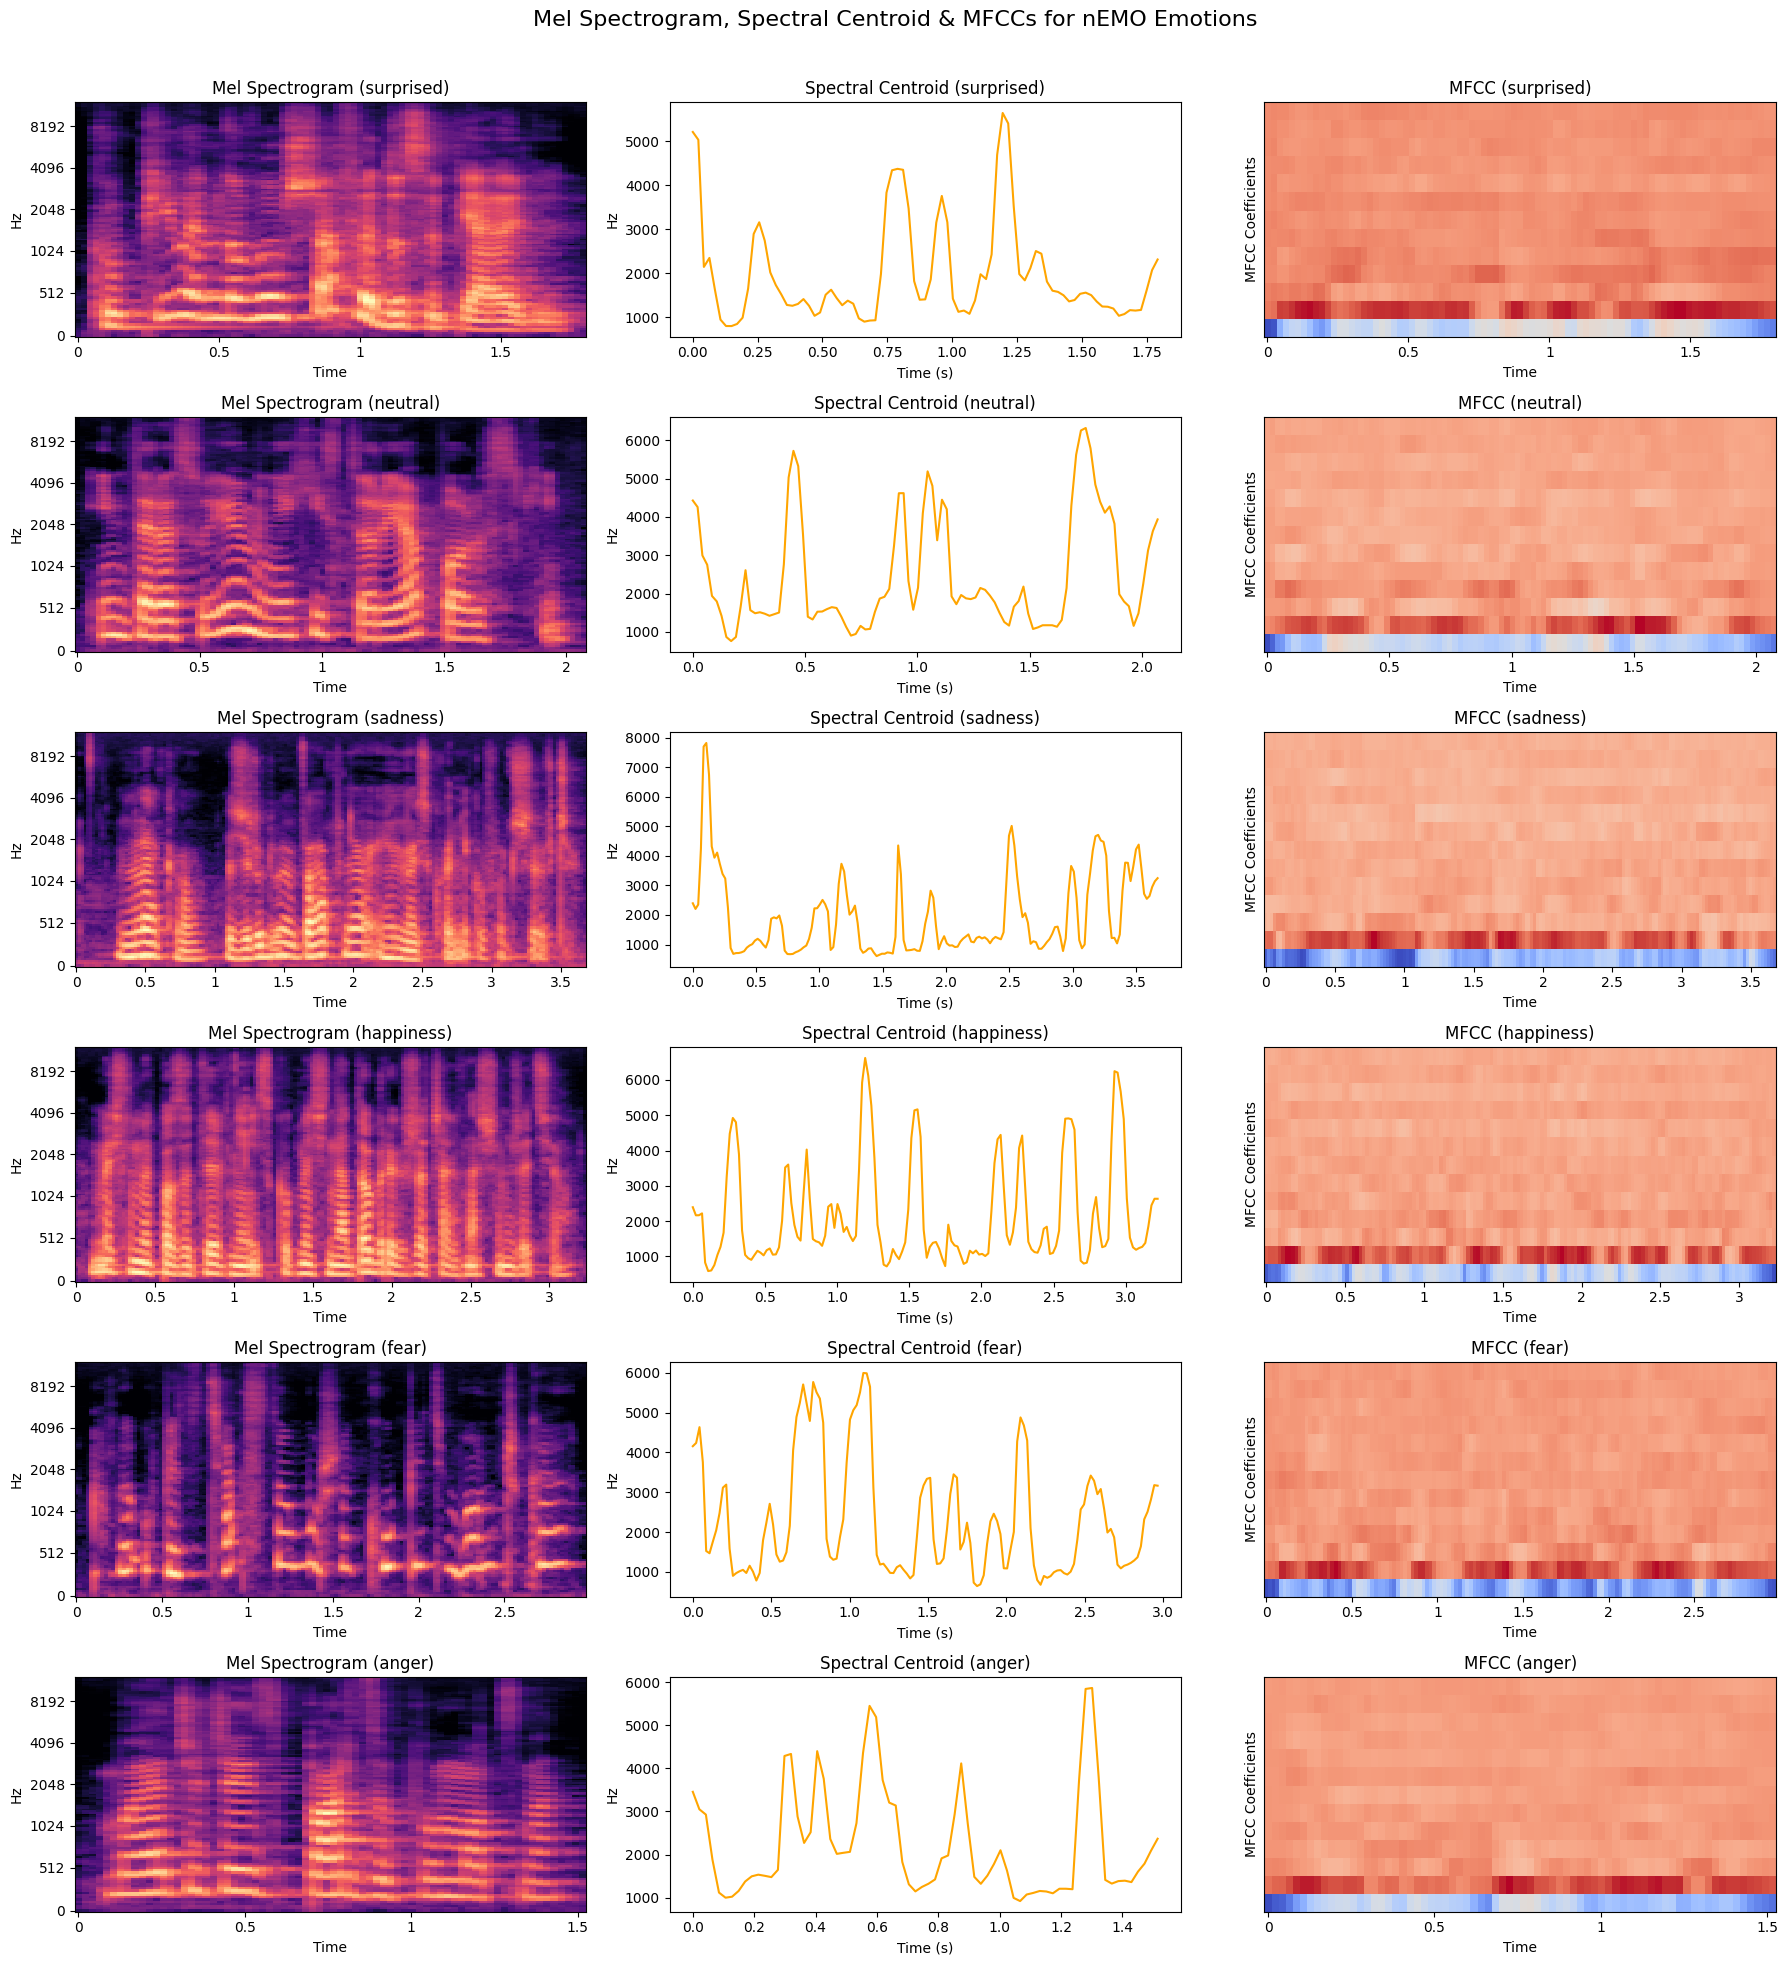

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# loading the nEMO dataset
ds = load_dataset("amu-cai/nEMO")

# extracting features with librosa
def extract_features(sample):
    y = sample['audio']['array']
    sr = sample['audio']['sampling_rate']
    emotion = sample['emotion']

    # Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # spectral envelope
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    times_centroid = librosa.frames_to_time(np.arange(len(spectral_centroid)), sr=sr)

    # MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    return y, sr, emotion, mel_db, spectral_centroid, times_centroid, mfcc

# emotion sample indexes - examples of every emotion in nEMO dataset
sample_indexes = {
    "surprised": 3,
    "neutral": 1,
    "sadness": 4,
    "happiness": 7,
    "fear": 10,
    "anger": 15
}

# plotting
fig, axes = plt.subplots(len(sample_indexes), 3, figsize=(18, 20))
fig.suptitle("Mel Spectrogram, Spectral Centroid & MFCCs for nEMO Emotions", fontsize=16)

# loop through each sample
for i, (emotion, index) in enumerate(sample_indexes.items()):
    sample = ds['train'][index]
    y, sr, emotion, mel_db, spectral_centroid, times_centroid, mfcc = extract_features(sample)

    # mel spectrogram
    librosa.display.specshow(mel_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel', ax=axes[i, 0])
    axes[i, 0].set_title(f"Mel Spectrogram ({emotion})")

    # spectral centroid
    axes[i, 1].plot(times_centroid, spectral_centroid, color='orange')
    axes[i, 1].set_title(f"Spectral Centroid ({emotion})")
    axes[i, 1].set_xlabel("Time (s)")
    axes[i, 1].set_ylabel("Hz")

    # MFCC
    librosa.display.specshow(mfcc, x_axis='time', ax=axes[i, 2], sr=sr)
    axes[i, 2].set_title(f"MFCC ({emotion})")
    axes[i, 2].set_ylabel("MFCC Coefficients")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
